In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'E:\DSBDAL\DSBDALExam DataSets\DSBDALExam DataSets\HeartDisease\heart.csv')

In [3]:
#a) Data Cleaning: Remove NA, ?, Negative values etc.
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Remove negative values (example for 'cholesterol' and 'thalach')
for col in ['chol', 'thalach', 'trestbps']:
    df = df[df[col] >= 0]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
#remove outliers using IQR
from scipy.stats import zscore
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [7]:
# c. Data Transformation (Scaling)
X = df.drop('target', axis=1) #all except target column
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Accuracy Comparison:
Logistic Regression Accuracy: 85.49222797927462 %
k-Nearest Neighbors Accuracy: 86.01036269430051 %


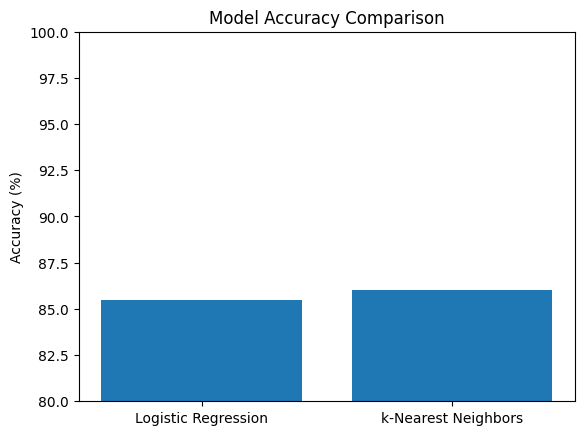

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Model Building

# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Step 6: Display Results
print("\nAccuracy Comparison:")
print("Logistic Regression Accuracy:", accuracy_logreg * 100, "%")
print("k-Nearest Neighbors Accuracy:", accuracy_knn * 100, "%")

# Step 7: Optional: Plot Accuracy Comparison
models = ['Logistic Regression', 'k-Nearest Neighbors']
accuracies = [accuracy_logreg, accuracy_knn]

plt.bar(models, [a * 100 for a in accuracies])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(80, 100)
plt.show()